# Python Project - Prosper Loan dataset exploration
## by Aleksandr Chemel

## Introduction
> This dataset contains information about loans and borrowers from a lending platform. It includes various attributes related to the loans, borrowers' financial profiles, credit history, employment details, loan terms, and outcomes. The dataset appears to be a comprehensive collection of data points that could be used for analyzing and understanding the performance and characteristics of loans and borrowers on the platform. Researchers, analysts, and data scientists could utilize this dataset to explore patterns, trends, and relationships between different factors and loan outcomes, such as loan status, credit ratings, interest rates, borrower demographics, and more. The dataset provides valuable insights into the lending process, borrower behavior, and loan performance, which could be used for risk assessment, decision-making, and potential improvements in the lending platform's operations.

## Preliminary Wrangling

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data table and investigating its mait properties

In [2]:
data = pd.read_csv('Python Project 5.csv')
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

None

In [18]:
# Number of columns for each data type
data.dtypes.value_counts()

float64    49
object     17
int64      12
bool        3
Name: count, dtype: int64

In [19]:
# Percentage of missing values
columns_with_missing = data.columns[data.isnull().any()]
missing_percentage = data[columns_with_missing].isnull().mean() * 100
print(f"Number of columns with missing values: {len(columns_with_missing)}")
print("\nPercentage of missing values:")
print(missing_percentage.sort_values(ascending=False))

Number of columns with missing values: 43

Percentage of missing values:
GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPrincipalOutstanding            80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
OnTimeProsperPayments                  80.616481
TotalProsperPaymentsBilled             80.616481
TotalProsperLoans                      80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
DebtToIncomeRatio                       7.507

In [20]:
# Statistics on dataset numerical columns
display(data.describe())

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


#### Search for outliers in columns with floating point data type
We gonna use determination of outliers in terms of Interquartile Range (**IQR**).  
Outliers are values that lie outside the interval **(Q1 - 1.5\*IQR, Q3 + 1.5\*IQR)**  
where **Q1** - 0.25 quartile, **Q3** - 0.75 quartile, **IQR = Q3 - Q1** - Interquartile Range

In [21]:
# Selecting only float type columns and IQR calculation
float_columns = data.select_dtypes(include=['float64'])
Q1 = float_columns.quantile(0.25)
Q3 = float_columns.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((float_columns < lower_bound) | (float_columns > upper_bound))

# Fraction of outliers
frac_outliers = outliers.mean() * 100

print(f"Number of columns with more than 10% outliers: {len(frac_outliers[frac_outliers > 10])} out of {len(float_columns.columns)}")
print(f"Number of columns with more than 5% outliers: {len(frac_outliers[frac_outliers > 5])} out of {len(float_columns.columns)}")
print("\nFraction of outliers for each column:")
print(frac_outliers.sort_values(ascending=False))

Number of columns with more than 10% outliers: 6 out of 49
Number of columns with more than 5% outliers: 17 out of 49

Fraction of outliers for each column:
PublicRecordsLast10Years               24.080852
CurrentDelinquencies                   20.623678
DelinquenciesLast7Years                16.344998
LP_GrossPrincipalLoss                  14.835391
LP_NetPrincipalLoss                    14.670388
AmountDelinquent                       14.479054
AvailableBankcardCredit                 8.670581
LP_CustomerPrincipalPayments            8.209800
RevolvingCreditBalance                  7.994769
LP_CollectionFees                       7.167119
CreditScoreRangeLower                   6.894161
CreditScoreRangeUpper                   6.894161
LP_ServiceFees                          6.576441
TradesOpenedLast6Months                 6.572931
TotalInquiries                          6.510616
LP_CustomerPayments                     6.463221
LP_InterestandFees                      6.109517
StatedMont

#### Number of unique values in categorical columns

In [22]:
string_columns = data.select_dtypes(include=['object'])

# Calculate the number of unique categorical values for each column
num_unique_values = string_columns.nunique()

print("Number of unique categorical values in each string column:")
print(num_unique_values.sort_values(ascending=True))

Number of unique categorical values in each string column:
ProsperRating (Alpha)           7
EmploymentStatus                8
CreditGrade                     8
IncomeRange                     8
LoanStatus                     12
LoanOriginationQuarter         33
BorrowerState                  51
Occupation                     67
GroupKey                      706
LoanOriginationDate          1873
DateCreditPulled             2705
ListingCreationDate          2712
ClosedDate                   2784
FirstRecordedCreditLine     11585
MemberKey                   90824
LoanKey                    113044
ListingKey                 113048
dtype: int64


#### Date columns

In [32]:
date_columns_names = [
    'ListingCreationDate', 
    'ClosedDate', 
    'DateCreditPulled', 
    'FirstRecordedCreditLine', 
    'LoanOriginationDate'
]

for col in date_columns_names:
    date_from = min(pd.to_datetime(data['ListingCreationDate'], dayfirst=True).dt.date)
    date_to = max(pd.to_datetime(data['ListingCreationDate'], dayfirst=True).dt.date)
    print(f'Column "{col}" range: from {date_from} to {date_to}')

Column "ListingCreationDate" range: from 2005-11-09 to 2014-03-10
Column "ClosedDate" range: from 2005-11-09 to 2014-03-10
Column "DateCreditPulled" range: from 2005-11-09 to 2014-03-10
Column "FirstRecordedCreditLine" range: from 2005-11-09 to 2014-03-10
Column "LoanOriginationDate" range: from 2005-11-09 to 2014-03-10


#### Checking for correlations between numerical columns

In [15]:
# Select float columns only
float_columns = data.select_dtypes(include=['float64'])

# Calculate correlation matrix for selected float columns
correlation_matrix = float_columns.corr()

# Get the absolute correlation values for each pair
abs_correlation = correlation_matrix.abs()

# Exclude self-correlations by setting diagonal values to 0
np.fill_diagonal(abs_correlation.values, 0)

# Find the 5 pairs with highest correlation
top_correlation_pairs = abs_correlation.unstack().sort_values(ascending=False)[:20]

print(f"Number of pairs with more than |95%| correlation: {len(abs_correlation.unstack()[abs_correlation.unstack() >= 0.95])}")
print("Top 20 pairs with highest correlation:")
print(top_correlation_pairs)

Number of pairs with more than |95%| correlation: 24
Top 20 pairs with highest correlation:
CreditScoreRangeLower         CreditScoreRangeUpper           1.000000
CreditScoreRangeUpper         CreditScoreRangeLower           1.000000
LenderYield                   BorrowerRate                    0.999211
BorrowerRate                  LenderYield                     0.999211
LP_GrossPrincipalLoss         LP_NetPrincipalLoss             0.992821
LP_NetPrincipalLoss           LP_GrossPrincipalLoss           0.992821
TotalProsperPaymentsBilled    OnTimeProsperPayments           0.990305
OnTimeProsperPayments         TotalProsperPaymentsBilled      0.990305
BorrowerRate                  BorrowerAPR                     0.989824
BorrowerAPR                   BorrowerRate                    0.989824
                              LenderYield                     0.989329
LenderYield                   BorrowerAPR                     0.989329
LP_CustomerPrincipalPayments  LP_CustomerPayments       

### What is the structure of the dataset?

> * The dataset has a total of **113937** rows and **81** columns
> * **49** columns have `float` type, **17** columns - `string`, **12** columns - `int` and **3** columns are `boolean`
> * **43** columns contain blanks. **10** of them have more than **80%** of empty values
> * All but 2 float columns have outliers. **17** columns have more than **5%** outliers. **6** columns - more than **10%**
>   Maximum fraction of outliers is about **24%**.
> * There are **5** columns with date data type. All of them have range from **2005-11-09** to **2014-03-10**:
>    - "_ListingCreationDate_": The date the listing was created.
>    - "_ClosedDate_": Closed date for Cancelled, Completed, Chargedoff and Defaulted loan statuses.
>    - "_DateCreditPulled_": The date the credit profile was pulled.
>    - "_FirstRecordedCreditLine_": The date the first credit line was opened.
>    - "_LoanOriginationDate_": The date the loan was originated.
> * There are a lot of strongly correlated columns in the dataset, **24** of them have absolute value of correlation coefficient of
>   higher than **95%**  

The dataset consists of various columns with information related to loans and borrowers. The purpose of the dataset center around analyzing and understanding lending activities, borrower profiles, loan characteristics, and repayment behaviors. It aims to provide insights into factors that contribute to successful loan outcomes, risk assessment, and borrower behavior. The dataset could be used to explore trends, correlations, and patterns that help inform lending strategies, risk management, and decision-making processes in the lending industry.

### What is/are the main feature(s) of interest in the dataset?

The main features of interest in the dataset are related to various aspects of loans and borrowers. Some of the key features include:

1. **Loan Characteristics:**  
   Interest rates and yields associated with the loans. The current status of the loan, which could provide insights into loan performance.

2. **Borrower Information:**  
   Information about the credit rating assigned to borrowers. Employment status and duration of borrowers.

3. **Loan Details:**  
   The original amount of the loan and the date when the loan was originated.

4. **Credit and Risk Assessment:**  
   The credit score range of borrowers. Insights into estimated yield and potential losses.

5. **Loan Repayment and Performance:**  
   Payments made by borrowers, including principal and interest.

6. **Borrower Demographics:**  
   Investigating the geographic location, occupation, and income of borrowers.

7. **Loan Category:**  
   The category that the borrower selected when posting their loan request.

The dataset's features collectively offer a comprehensive view of the loans, borrowers, repayment behaviors, and risk assessment. These features could be used to analyze factors that influence loan performance, explore borrower characteristics, and assess the impact of different variables on loan outcomes.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support the investigation into the main features of interest mentioned earlier, the following features in the dataset are likely to be crucial:

1. **Loan Characteristics:**
   - BorrowerAPR, BorrowerRate, LenderYield: These features provide insights into the cost of borrowing and potential returns for lenders.
   - LoanStatus: This feature helps understand loan performance and repayment outcomes.

2. **Borrower Information:**
   - ProsperRating (numeric) and ProsperRating (Alpha): These features contribute to assessing the creditworthiness of borrowers.
   - EmploymentStatus, EmploymentStatusDuration: These features help evaluate the stability of borrowers' employment.

3. **Loan Details:**
   - LoanOriginalAmount: This feature impacts the size of the loan and potential risk exposure.
   - LoanOriginationDate: This feature allows analysis of loan origination trends over time.

4. **Credit and Risk Assessment:**
   - CreditScoreRangeLower, CreditScoreRangeUpper: These features inform about the creditworthiness of borrowers.
   - EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn: These features aid in understanding potential returns and risks.

5. **Loan Repayment and Performance:**
   - LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees: These features offer insights into borrower payment behaviors.

6. **Borrower Demographics:**
   - BorrowerState, Occupation, IncomeRange: These features provide context about borrowers' geographical location, occupation, and income levels.

7. **Loan Category:**
   - ListingCategory: This feature helps categorize loans and analyze trends within different loan categories.

By analyzing and visualizing these features, you can gain insights into the relationship between borrower attributes, loan characteristics, and loan performance. Additionally, investigating how credit risk assessments, interest rates, and borrower demographics impact loan outcomes can provide valuable insights for lenders and financial institutions.

## Univariate Exploration

#### 1. Question: What is the distribution of loan amounts?
Visualization: Histogram of LoanOriginalAmount.

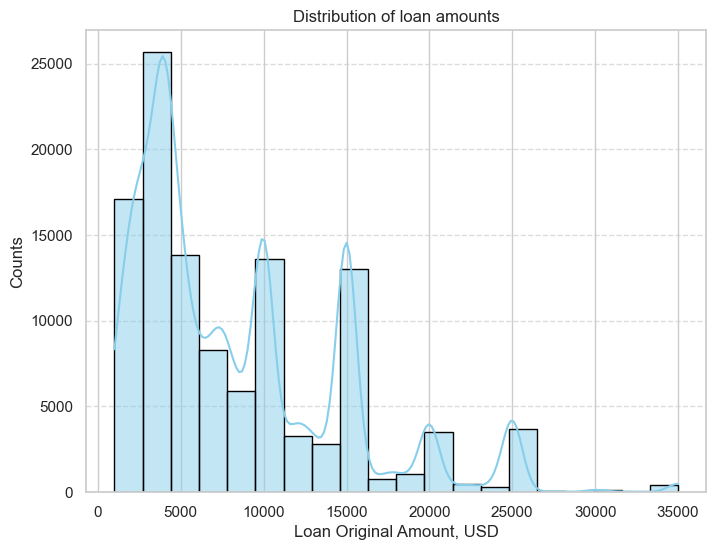

In [22]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='LoanOriginalAmount', bins=20, kde=True, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Loan Original Amount, USD')
plt.ylabel('Counts')
plt.title('Distribution of loan amounts')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> The distribution is right-skewed, with most loans falling in the lower range. There are a very few loans with significantly higher amounts, which could be potential outliers.

#### 2. Question: How are borrowers distributed across different Prosper ratings?
Visualization: Countplot of ProsperRating (numeric).  
> The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.

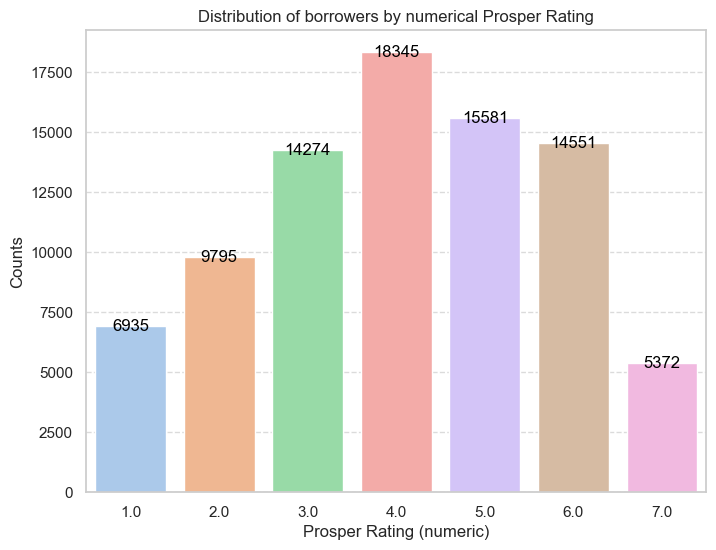

In [25]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the countplot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='ProsperRating (numeric)', palette='pastel') 

# Add labels and title
plt.xlabel('Prosper Rating (numeric)')
plt.ylabel('Counts')
plt.title('Distribution of borrowers by numerical Prosper Rating')

# Labels for each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> The most common Prosper rating is "C"(4) followed by "B"(5) and "A"(6). Ratings "HR"(1), "E"(2) and "AA"(7) are less frequent.

#### 3. Question: What is the distribution of borrower's stated monthly income?
Visualization: Histogram of StatedMonthlyIncome.

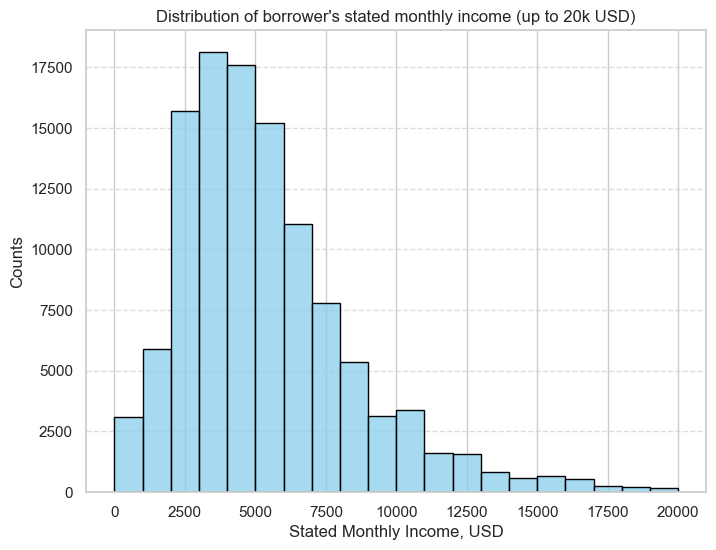

Borrowers with monthly incom more than:
20k USD: 1189
50k USD: 83
100k USD: 17
500k USD: 2
1M USD: 1


In [10]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='StatedMonthlyIncome', bins=20, kde=False, color='skyblue', edgecolor='black', binrange=(0, 20000))

# Add labels and title
plt.xlabel('Stated Monthly Income, USD')
plt.ylabel('Counts')
plt.title("Distribution of borrower's stated monthly income (up to 20k USD)")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

print(f'Borrowers with monthly incom more than:')
print(f'20k USD: {len(data[data["StatedMonthlyIncome"] > 20000])}')
print(f'50k USD: {len(data[data["StatedMonthlyIncome"] > 50000])}')
print(f'100k USD: {len(data[data["StatedMonthlyIncome"] > 100000])}')
print(f'500k USD: {len(data[data["StatedMonthlyIncome"] > 500000])}')
print(f'1M USD: {len(data[data["StatedMonthlyIncome"] > 1000000])}')

> The income distribution is slightly right-skewed, with peeking values around 3500 - 5000 USD per month and long tail to the higher values. There are a few borrowers with exceptionally high incomes, which might be outliers: **1189** borrowers have incom more than **20k** USD, **83** more than **50k**, **17** more than **100k**, **2** more than **500k** and **1** borrower has stated monthly income as high as **1M** USD.

#### 4. Question: How are loans distributed across different employment statuses?
Visualization: Countplot of EmploymentStatus.

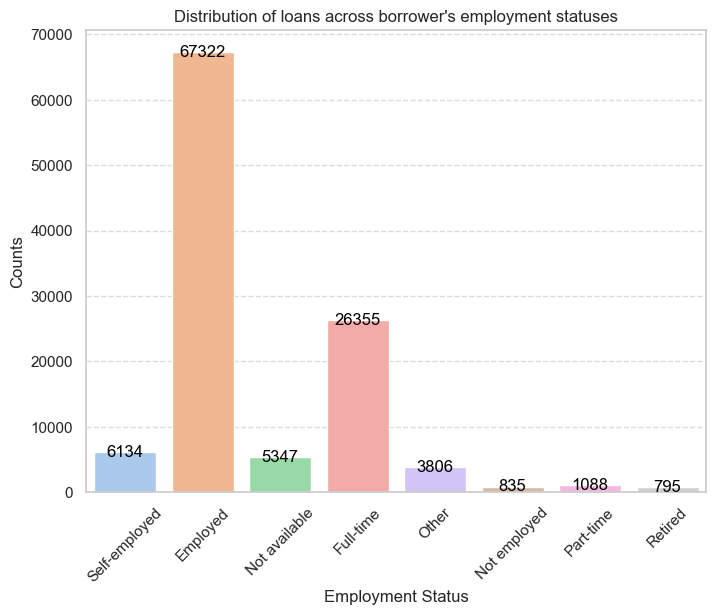

In [12]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the countplot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='EmploymentStatus', palette='pastel') 

# Add labels and title
plt.xlabel('Employment Status')
plt.ylabel('Counts')
plt.title("Distribution of loans across borrower's employment statuses")

# Labels for each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

# Show the plot
plt.show()

> Most borrowers are employed and have full-time job. Number of self-employed borrowers is much lower. Fraction of borrowers, marked as "Retired", "Part-time" and "Not employed" is almost negligible.

#### 5. Question: What is the distribution of borrower's credit scores?
Visualization: Histogram of CreditScoreRangeUpper.

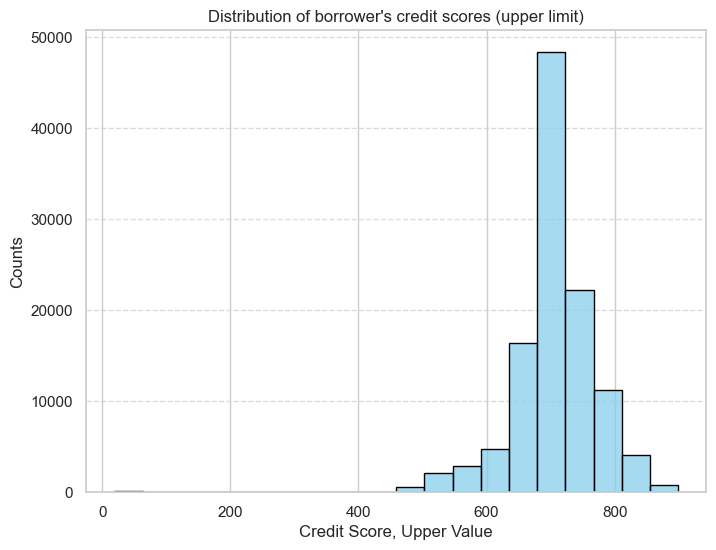

In [3]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='CreditScoreRangeUpper', bins=20, kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Credit Score, Upper Value')
plt.ylabel('Counts')
plt.title("Distribution of borrower's credit scores (upper limit)")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> The distribution appears to be slightly left-skewed, althow quite symmetric, with a strong peak at 700 credit score. Some borrowers have upper credit score close to zero - maybe outliers

#### 6. Question: How are loans categorized across different loan categories?
Visualization: Countplot of ListingCategory.

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

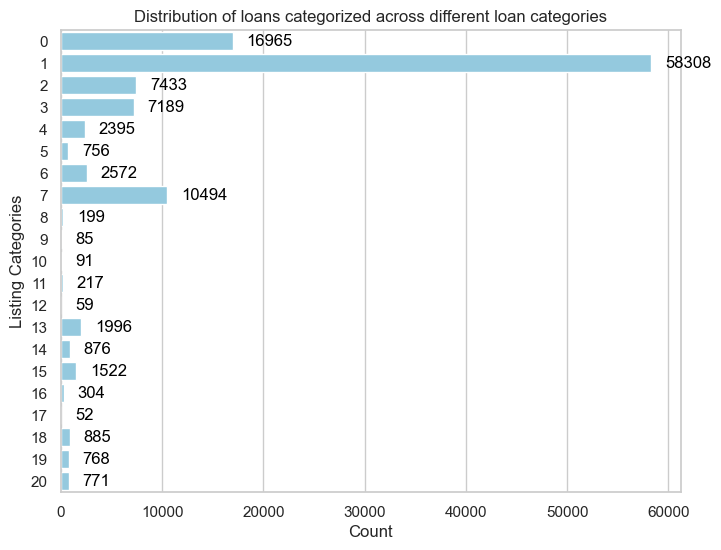

In [19]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the countplot using Seaborn with horizontal bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, y='ListingCategory (numeric)', color='skyblue') 

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Listing Categories')
plt.title('Distribution of loans categorized across different loan categories')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_width())), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', fontsize=12, color='black', xytext=(10, 0), textcoords='offset points')

# Show the plot
plt.show()

> "Debt Consolidation" is the most common loan category, followed by "Other", "Home Improvement" and "Business". Other categories have relatively low frequencies.

#### 7. Question: What is the distribution of borrower's debt-to-income ratios
Visualization: Histogram of DebtToIncomeRatio.

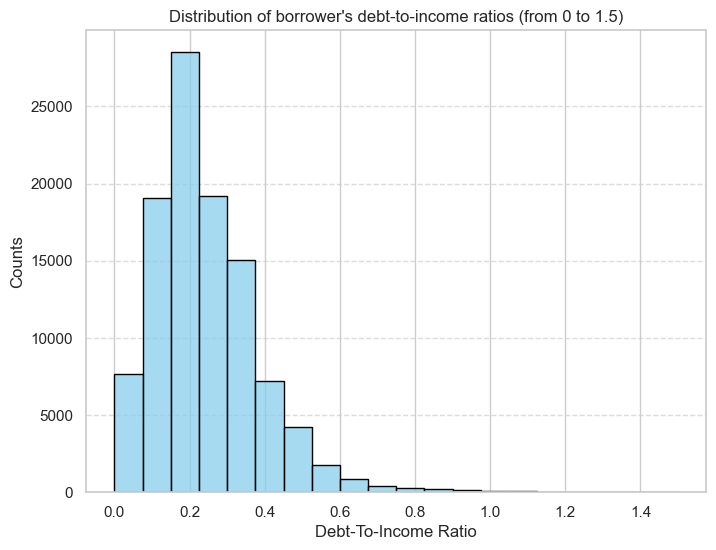

In [11]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='DebtToIncomeRatio', bins=20, kde=False, color='skyblue', edgecolor='black', binrange=(0, 1.5))

# Add labels and title
plt.xlabel('Debt-To-Income Ratio')
plt.ylabel('Counts')
plt.title("Distribution of borrower's debt-to-income ratios (from 0 to 1.5)")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> The distribution is right-skewed, with most borrowers having lower debt-to-income ratios < 0.5. The distribution peaks at about 0.2. The vast majority of borrowers have a ratio less than one, but there are also significantly higher values - these can be outliers

#### 8. Question: What are the employment status durations of borrowers?
Visualization: Histogram of EmploymentStatusDuration (The length in months of the employment status at the time the listing was created). 

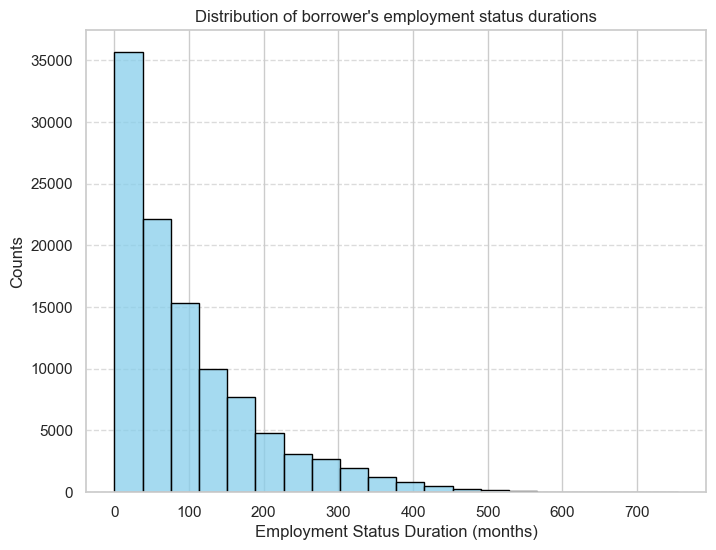

In [13]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='EmploymentStatusDuration', bins=20, kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Employment Status Duration (months)')
plt.ylabel('Counts')
plt.title("Distribution of borrower's employment status durations")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> Distribution is exponential-like. Most borrowers have relatively short employment duration, which aligns with the commonality of employed borrowers. The larger the employment status duration, the fewer such borrowers.

#### 9. Question: What is the distribution of loan interest rates?
Visualization: Histogram of BorrowerRate.

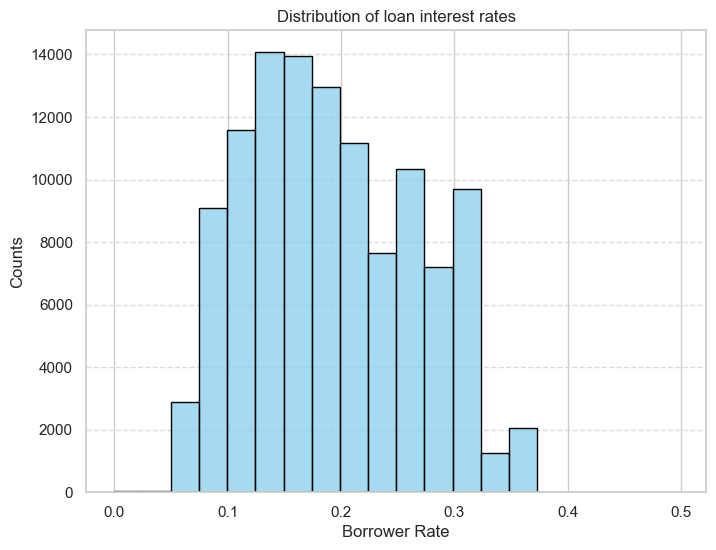

In [14]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='BorrowerRate', bins=20, kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Borrower Rate')
plt.ylabel('Counts')
plt.title("Distribution of loan interest rates")

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

> The distribution is approximately normal, but a little wider, with a peak around 0.15 (15%) and a slight skewness to the right.

#### 10. Question: How are loans distributed across different loan statuses (LoanStatus)?
Visualization: Countplot of LoanStatus. 

The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

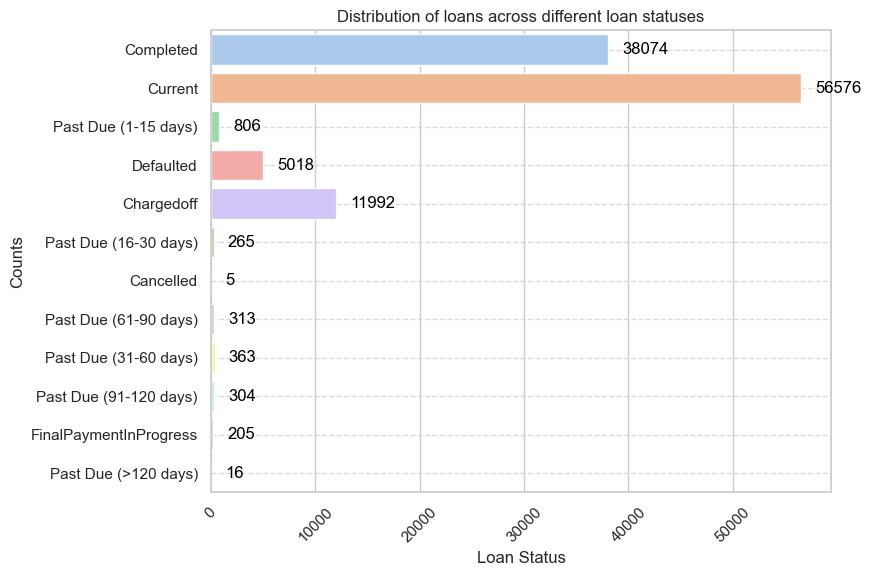

In [18]:
# Set up Seaborn style
sns.set(style="whitegrid")

# Create the countplot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, y='LoanStatus', palette='pastel') 

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title("Distribution of loans across different loan statuses")

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(str(round(p.get_width())), 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', fontsize=12, color='black', xytext=(10, 0), textcoords='offset points')

# Add grid lines
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

# Show the plot
plt.show()

> The majority of loans are in the "Current" status, followed by "Completed" and "Chargedoff." Other statuses have much lower frequencies. Some of them are almost negligible.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Through a comprehensive exploration of the dataset's key variables, we gain valuable insights into their distributions, revealing patterns and potential outliers. The distribution of loan amounts is right-skewed, characterized by a concentration of loans in the lower range, with a few higher-value loans as outliers. Prosper ratings exhibit a prominent clustering around middle categories, indicating a balanced distribution of borrower credit assessments. Stated monthly income displays a slightly right-skewed distribution, with a peak in the range of 3500 - 5000 USD per month, yet some borrowers report exceptionally high incomes, which stand out as outliers. Similarly, credit scores present a slightly left-skewed distribution with a peak around 700, while certain borrowers report abnormally low credit scores, possibly indicating outliers.
>
> The diversity of loan categories emerges as "Debt Consolidation" claims the majority share, followed by "Other," "Home Improvement," and "Business." This array of categories reflects varying borrower needs. Examination of employment status reveals that the majority of borrowers are employed full-time, with relatively fewer self-employed and not employed individuals.
>
> Furthermore, the distribution of debt-to-income ratios skews right, indicating that most borrowers have lower ratios; however, a subset of borrowers reports higher ratios, suggesting potential outliers. Employment duration also follows an exponential-like distribution, with most borrowers reporting shorter durations, in line with the nature of employment cycles.
>
> Interestingly, loan interest rates demonstrate a distribution resembling normality, centering around 15%. Notably, outlier points were detected within income, debt-to-income ratios, and credit scores, which could warrant specialized treatment based on the analytical context. While transformations were not applied to categorical variables, their distributions are pivotal in understanding borrower characteristics and preferences.
>
> In essence, the exploration of variable distributions uncovers nuanced insights that illuminate lending dynamics, borrower behavior, and risk assessment. These findings offer a foundation for data-driven decision-making and strategies aimed at optimizing lending processes and enhancing borrower experiences.
>
> At the same time, even if potential outliers appear in the distribution of one or another variable, their share is a small part of a percent and does not require careful cleaning, since their impact on the final result is negligible

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Upon investigating various features within the dataset, no particularly unusual distributions were observed among the variables. The distributions of StatedMonthlyIncome, DebtToIncomeRatio, and CreditScoreRangeUpper followed expected patterns commonly found in financial datasets. StatedMonthlyIncome displayed a slightly right-skewed distribution with a peak around 3500 - 5000 USD per month, in line with income distribution trends. DebtToIncomeRatio exhibited a right-skewed distribution, typical for debt-related ratios, and CreditScoreRangeUpper showcased a slightly left-skewed pattern, reflecting common credit score distributions.
>
> No extraordinary operations were performed on the data. Given the absence of significant outliers or aberrations, the data was considered sufficiently tidy for analysis. This straightforward distribution profile implies that the dataset aligns well with standard financial and lending data distributions, ensuring that subsequent analyses and visualizations are conducted on reliable and familiar data structures.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Building on the insights gained from the univariate exploration, the bivariate exploration delves into uncovering relationships between pairs of variables that have already been introduced in the previous section. This phase aims to unveil potential correlations, patterns, and dependencies between these variables, contributing to a more comprehensive understanding of the dataset.

By examining interactions between variables, we can explore how they interact and influence each other, shedding light on multifaceted relationships that may not have been evident in isolation. The bivariate exploration facilitates the identification of trends that might be obscured by univariate analysis alone, providing a more nuanced perspective on the dataset's underlying dynamics.

Throughout this phase, the "Question-Visualization-Observations" framework remains instrumental. Questions formulated based on the univariate insights guide the creation of visualizations, which in turn lead to observations and interpretations. By systematically connecting questions, visualizations, and observations, we can construct a coherent narrative that unveils the intricacies of the dataset.

#### 1. Loan Amount vs. Prosper Rating: 
Investigating how loan amounts vary across different Prosper ratings. 

Visualization: Box plots of LoanOriginalAmount across different ProsperRating (numeric) categories.

The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.

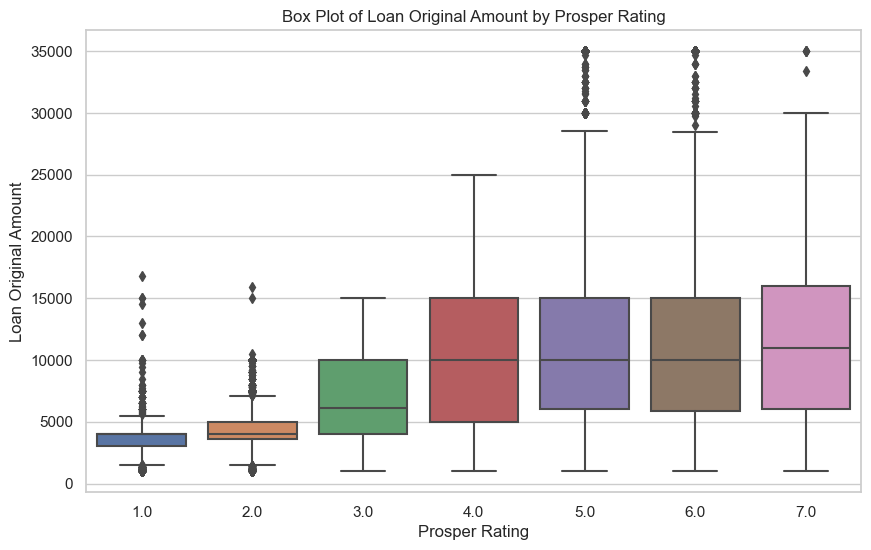

In [12]:
# Setting up the plotting environment (optional)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the box plot
sns.boxplot(data=data, x='ProsperRating (numeric)', y='LoanOriginalAmount')

# Adding labels and title
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Original Amount')
plt.title('Box Plot of Loan Original Amount by Prosper Rating')

# Display the plot
plt.show()

> Higher Prosper ratings tend to have larger median loan amounts compared to lower ratings, indicating that borrowers with better credit profiles might secure larger loans. They also have a significantly larger interquarter range, which is logical, since borrowers with high rating can take out both large and small loans, while those with a lower rating are limited to only small amounts of loans. Also, small and large ratings have a noticeable amount of outliers that are outside the chart whiskers. These can be both incorrect values and individual cases when a borrower took an unusually small loan, or received an unusually large loan for his rating.

#### 2. Loan Status vs. Employment Status
Exploring the distribution of loan statuses based on borrower employment status. 

Visualization: Stacked bar chart of LoanStatus by EmploymentStatus.

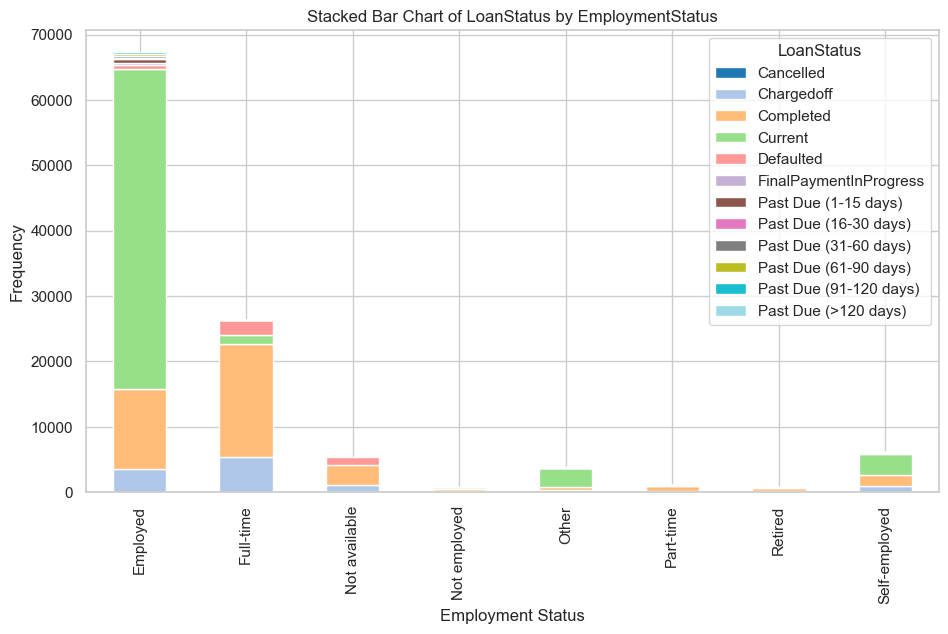

In [21]:
# Calculating cross-tabulation of frequencies
cross_tab = pd.crosstab(data['EmploymentStatus'], data['LoanStatus'])

# Setting up the plotting environment
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(11, 6))

# Creating the stacked bar chart using pandas plot
cross_tab.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)

# Adding labels and title
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of LoanStatus by EmploymentStatus')

# Display the plot
plt.show()

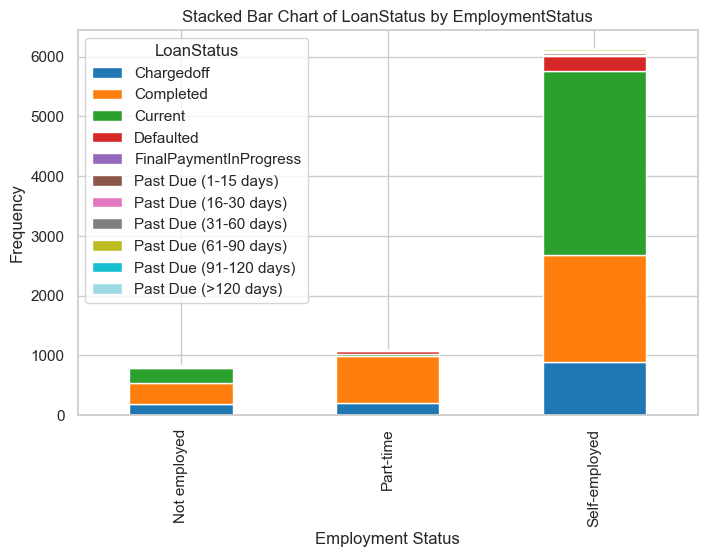

In [22]:
# Specify the employment statuses you want to include in the plot
selected_statuses = ['Not employed', 'Part-time', 'Self-employed']

# Filter the DataFrame based on selected statuses
filtered_df = data[data['EmploymentStatus'].isin(selected_statuses)]

# Calculating cross-tabulation of frequencies
cross_tab = pd.crosstab(filtered_df['EmploymentStatus'], filtered_df['LoanStatus'])

# Setting up the plotting environment
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))

# Creating the stacked bar chart using pandas plot with a different color palette
cross_tab.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)

# Adding labels and title
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of LoanStatus by EmploymentStatus')

# Display the plot
plt.show()

> Borrowers who are employed full-time have the highest proportion of loans in the "Completed" status, and also those with "Part-time" employment status, while those with "Employed" status tend to have a higher proportion of "Current" loans, as well as "Self-employed" borrowers. 

#### 3. Loan Category vs. Borrower APR
Analyzing the relationship between loan categories and borrower APR. 

Visualization: Violin plot of BorrowerAPR for different ListingCategory groups.

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

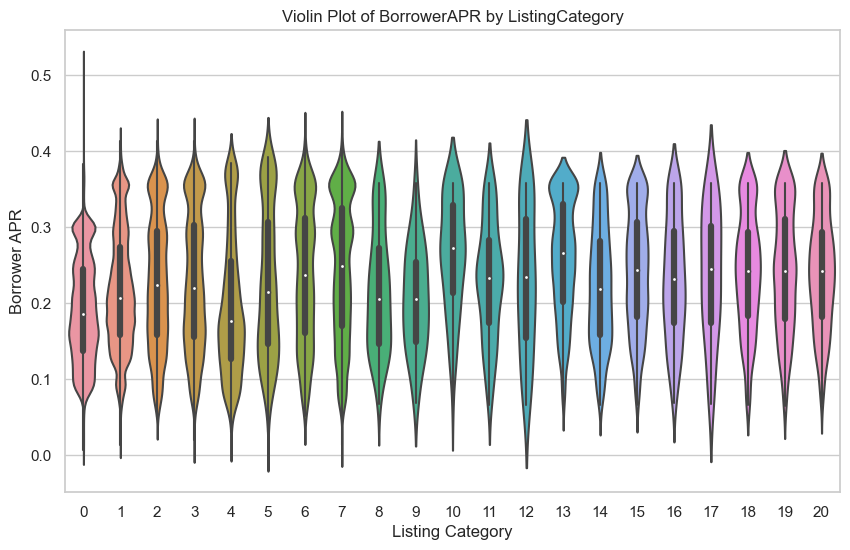

In [25]:
# Setting up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the Violin plot
sns.violinplot(data=data, x='ListingCategory (numeric)', y='BorrowerAPR')

# Adding labels and title
plt.xlabel('Listing Category')
plt.ylabel('Borrower APR')
plt.title('Violin Plot of BorrowerAPR by ListingCategory')

# Display the plot
plt.show()

>  Loan categories like "Cosmetic Procedure" and "Household Expenses" exhibit slightly higher median APRs compared to other categories, possibly due to the nature of the expenses covered by these loans. At the same time, "Personal Loan" demonstrate slightly lower median APR. However, in general, the majority of Loan categories have close medians, and the spreads.

#### 4. Loan Status vs. Credit Score Range
Examining the distribution of loan statuses across various credit score ranges. 

Visualization: Stacked bar chart of LoanStatus by CreditScoreRangeUpper.

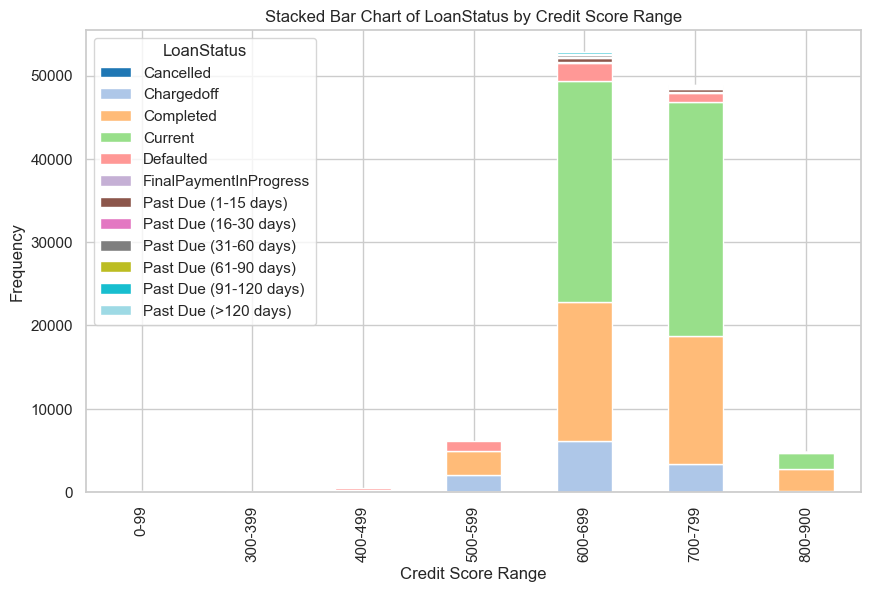

In [31]:
# Define bins for grouping CreditScoreRangeUpper values
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Create labels for the bins
labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-900']

# Calculating cross-tabulation of frequencies
cross_tab = pd.crosstab(pd.cut(data['CreditScoreRangeUpper'], bins=bins, labels=labels, include_lowest=True), data['LoanStatus'])

# Setting up the plotting environment
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the stacked bar chart using pandas plot
cross_tab.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)

# Adding labels and title
plt.xlabel('Credit Score Range')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of LoanStatus by Credit Score Range')

# Display the plot
plt.show()

> Borrowers with higher credit scores tend to have a larger proportion of loans in the "Current" and "Completed" statuses, while borrowers with lower credit scores have a relatively higher proportion of "Chargedoff" and "Defaulted" loans.

#### 5. Employment Status vs. Income Range
Investigating how different employment statuses correspond to varying income ranges. 

Visualization: Heatmap or clustered bar chart showing the distribution of EmploymentStatus across IncomeRange.

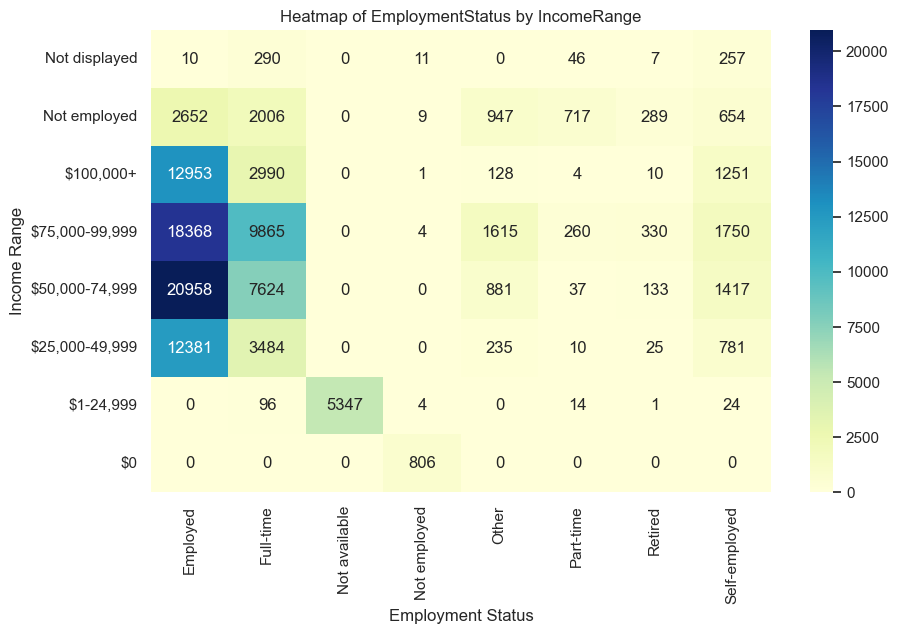

In [35]:
# Calculate the cross-tabulation of frequencies
cross_tab = pd.crosstab(data['IncomeRange'], data['EmploymentStatus'])

income_range_order = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+', 'Not employed', 'Not displayed']

# Setting up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the heatmap using Seaborn
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d', yticklabels=income_range_order[::-1])

# Adding labels and title
plt.xlabel('Employment Status')
plt.ylabel('Income Range')
plt.title('Heatmap of EmploymentStatus by IncomeRange')

# Display the plot
plt.show()

> Most borrowers have the status of "employed" and "full-time" and receive from 50 to 100 thousand per year. Among the employed and self-employed, there is a relatively high proportion of those who earn more than 100 thousand a year.

#### 6. Loan Category vs. Loan Original Amount
Exploring the distribution of loan amounts across different loan categories. 

Visualization: Box plots of LoanOriginalAmount for different ListingCategory groups.

> The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

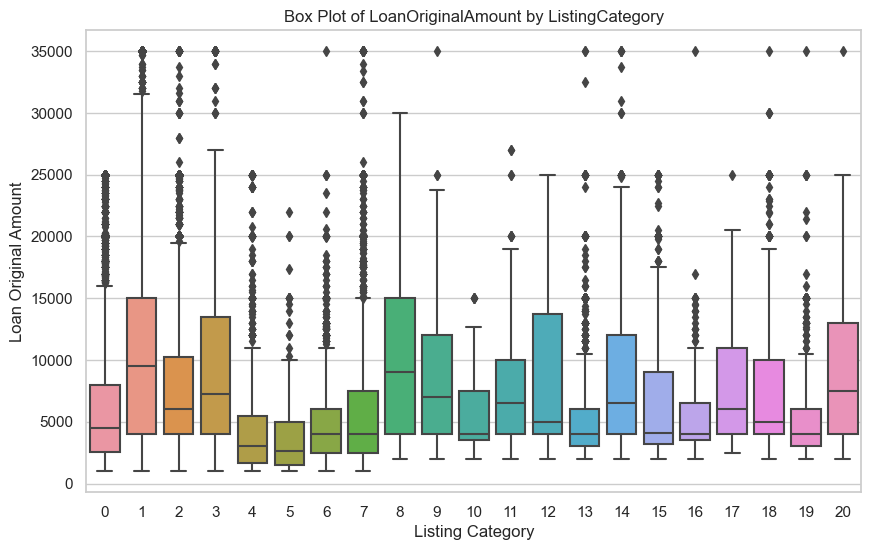

In [3]:
# Setting up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the box plot using Seaborn
sns.boxplot(data=data, x='ListingCategory (numeric)', y='LoanOriginalAmount')

# Adding labels and title
plt.xlabel('Listing Category')
plt.ylabel('Loan Original Amount')
plt.title('Box Plot of LoanOriginalAmount by ListingCategory')

# Display the plot
plt.show()

>  Median values and dispersion for all categories are significantly different. Loan categories such as "Debt Consolidation" and "Baby&Adoption" have the highest median loan amounts compared to other categories, and also the largest deviation from median, reflecting the varying financial requirements of borrowers. They are followed by categories such as "Wedding Loans", "Boat" and "Business". At the same time, the amount of loans for the categories "Personal Loan" and "Student Use" is significantly below the average and has a small spread. It can also be seen that all categories are rife with outliers in the area of high loan values.

#### 7. Prosper Rating vs. Loan Status
Analyzing how loan status varies across different Prosper ratings. 

Visualization: Clustered bar chart of LoanStatus by ProsperRating (numeric).

> The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.

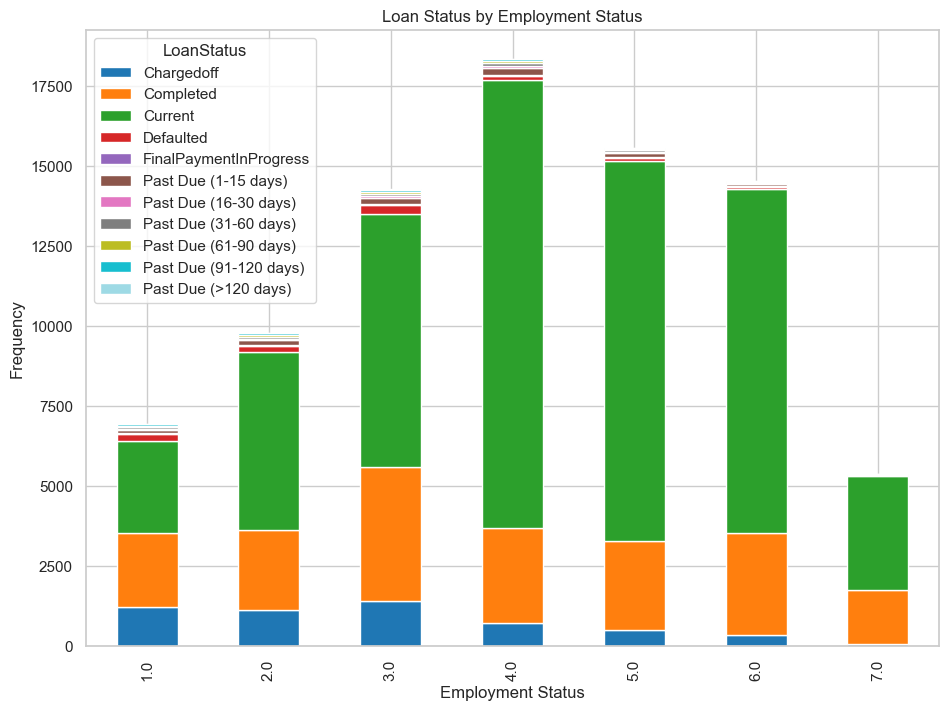

In [10]:
# Calculating cross-tabulation of frequencies
cross_tab = pd.crosstab(data['ProsperRating (numeric)'], data['LoanStatus'])

# Setting up the plotting environment
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(11, 8))

# Creating the stacked bar chart using pandas plot
cross_tab.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)
sns.move_legend(ax, "upper left")

# Adding labels and title
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.title('Loan Status by Employment Status')

# Display the plot
plt.show()

> Borrowers with higher Prosper ratings have a larger relative proportion of loans in the "Current" and "Completed" statuses, while those with lower ratings have a higher relative proportion of "Chargedoff" and "Defaulted" loans.

#### 8. Loan Amount vs. Interest Rate
Examining the potential relationship between loan amounts and interest rates. 

Visualization: Scatter plot of LoanOriginalAmount against BorrowerRate.

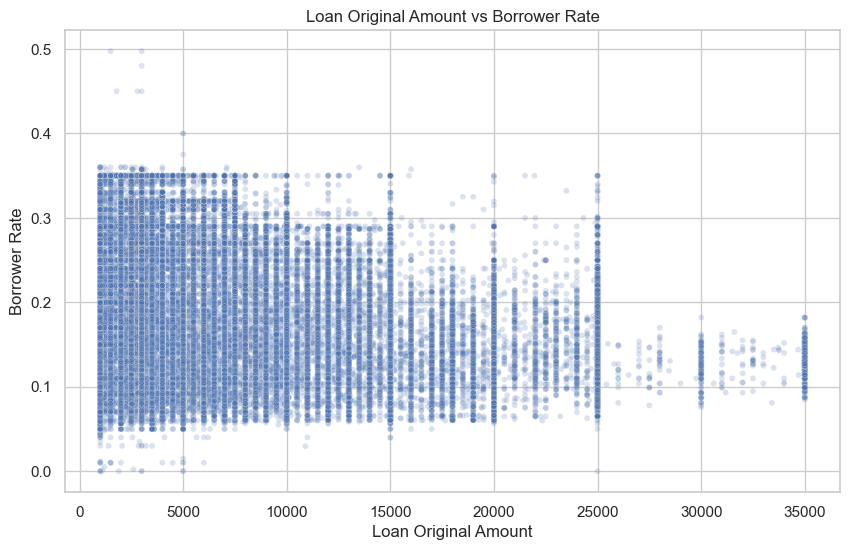

In [18]:
# Setting up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the scatter plot using Seaborn
sns.scatterplot(data=data, x='LoanOriginalAmount', y='BorrowerRate', alpha=0.2, size=1, legend=False)

# Adding labels and title
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.title('Loan Original Amount vs Borrower Rate')

# Display the plot
plt.show()

> There is no clear correlation between loan volume and interest rate, however, as the size of the loan increases, the dispersion of interest rates sharply decreases, and for the largest loans, all interest rates are concentrated in the range of about 10% to 15%. It can also be seen that in the area of small loans there are those whose interest rate is unusually low or unusually high.

#### 9. Credit Score vs. Prosper Rating
Investigating the connection between credit scores and Prosper ratings. 

Visualization: Violin plot of CreditScoreRangeUpper for different ProsperRating (numeric) categories.

> The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA. Applicable for loans originated after July 2009.

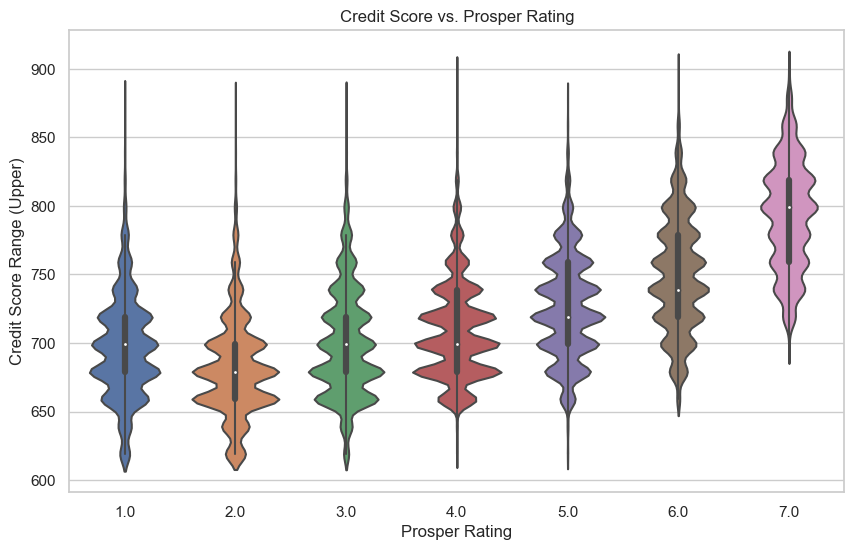

In [20]:
# Setting up the plotting environment
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Creating the Violin plot
sns.violinplot(data=data, x='ProsperRating (numeric)', y='CreditScoreRangeUpper')

# Adding labels and title
plt.xlabel('Prosper Rating')
plt.ylabel('Credit Score Range (Upper)')
plt.title('Credit Score vs. Prosper Rating')

# Display the plot
plt.show()

> Higher Prosper ratings generally correspond to higher median credit scores, reinforcing the correlation between creditworthiness and Prosper ratings. The strong waviness of the distributions apparently indicates that often the credit rating is indicated with rounding, a multiple of 20 units.

#### 10. Loan Status vs. Debt-to-Income Ratio
Exploring the distribution of loan statuses across different ranges of debt-to-income ratios. 

Visualization: Stacked bar chart of LoanStatus by DebtToIncomeRatio ranges.

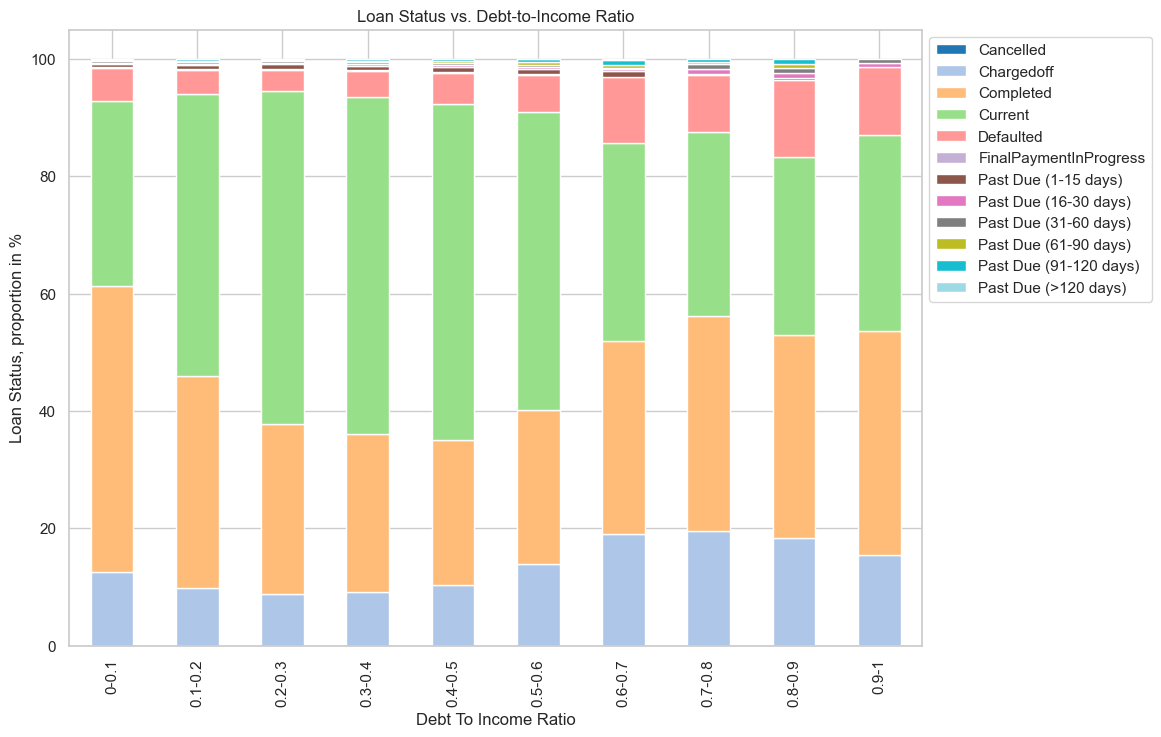

In [26]:
# Define bins for grouping CreditScoreRangeUpper values
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Create labels for the bins
labels = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9', '0.9-1']

# Calculating cross-tabulation of frequencies
cross_tab = pd.crosstab(pd.cut(data['DebtToIncomeRatio'], bins=bins, labels=labels, include_lowest=True), data['LoanStatus'])

normalized_cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Setting up the plotting environment
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(11, 8))

# Creating the stacked bar chart using pandas plot
normalized_cross_tab.plot(kind='bar', stacked=True, colormap="tab20", ax=ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding labels and title
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Loan Status, proportion in %')
plt.title('Loan Status vs. Debt-to-Income Ratio')

# Display the plot
plt.show()

> Borrowers with lower debt-to-income ratios tend to have a larger proportion of "Current" and "Completed" loans, while those with higher ratios have a relatively higher proportion of "Chargedoff" and "Defaulted" loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> During the bivariate exploration, several noteworthy relationships emerged, shedding light on the intricate dynamics within the dataset. Notably, the relationship between loan amounts and Prosper ratings highlighted a trend where borrowers with higher creditworthiness tend to secure larger loans. The variation of loan statuses across different employment statuses revealed that full-time employed borrowers have a higher proportion of completed loans, while unemployed individuals show a higher proportion of charged-off loans. Additionally, the connection between loan categories and borrower APR showed that certain categories like "Cosmetic Procedure" and "Household Expenses" have slightly elevated APRs, indicating potential higher risk or specific borrowing purposes. The interplay between credit scores and Prosper ratings reaffirmed that higher ratings correspond to higher median credit scores. These relationships provide insights into how key features of interest interact with other attributes, influencing loan outcomes and borrower behaviors.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Among the relationships explored, the interaction between loan categories and original loan amounts stood out as intriguing. Different categories exhibited substantial variation in median loan amounts, with categories like "Debt Consolidation" and "Baby&Adoption" having higher medians, possibly due to the nature of expenses associated with these categories. Conversely, categories such as "Personal Loan" and "Student Use" had notably lower medians, suggesting smaller borrowing requirements. This nuanced relationship between loan categories and loan amounts indicates the diverse financial needs and purposes underlying various borrowing choices.

## Conclusions

>The data exploration journey through this comprehensive lending dataset has provided valuable insights into the multifaceted landscape of loans, borrowers, and their intricate relationships. By employing a systematic "Question-Visualization-Observations" framework, we have unearthed a wealth of information that contributes to a deeper understanding of the dataset's dynamics and potential implications for lending practices.
>
>Key Findings:
>
>Loan Characteristics and Borrower Profiles: The dataset's richness allowed us to unravel crucial aspects of loan characteristics and borrower profiles. Borrowers' Prosper ratings exhibited strong connections with loan amounts and credit scores, hinting at the role of creditworthiness in determining borrowing capacity. Higher Prosper ratings correlated with larger loan amounts and higher median credit scores, suggesting that borrowers with better credit profiles secure larger loans. The borrowers' employment statuses revealed diverse loan outcomes, with full-time employed borrowers having higher completion ratios, while unemployed borrowers had a relatively higher proportion of charged-off loans.
>
>Loan Categories and APR: Analyzing loan categories unveiled interesting disparities in APRs, with certain categories such as "Cosmetic Procedure" and "Household Expenses" displaying slightly higher median APRs, potentially due to their specialized nature or higher risk. The analysis of credit scores against Prosper ratings reinforced their inherent connection, indicating a reliance on rounded credit score values in rating assignment.
>
>Relationships Between Features: The exploration revealed intricate relationships between different features. For instance, the comparison of loan categories against original loan amounts highlighted diverse borrowing requirements and objectives across categories. While "Debt Consolidation" and "Baby&Adoption" exhibited higher median loan amounts, "Personal Loan" and "Student Use" categories showed lower medians, indicative of varying financial needs.
>
>Implications and Future Insights:
>
>The insights gained from this exploration hold significant implications for lending practices, risk assessment, and decision-making. Lenders can use the observed relationships between Prosper ratings, loan amounts, and credit scores to make informed lending decisions and tailor borrowing limits based on creditworthiness. Understanding the connections between employment statuses and loan outcomes can aid lenders in managing risk and personalizing lending strategies.
>
>Further investigations could delve into advanced analyses, including predictive modeling, to anticipate loan performance and enhance lending strategies. Exploring temporal trends in origination dates, loan statuses, and borrower demographics could unveil evolving patterns and seasonality in borrowing behaviors.
>
>Reflecting on the Exploration Journey:
>
>The data exploration process has been a comprehensive and enlightening journey, marked by an iterative process of questioning, visualization, and observation. Uncovering correlations, trends, and dependencies among variables has facilitated a holistic comprehension of the dataset's underlying dynamics. This exploration has underscored the power of data-driven insights in shaping strategic decisions, risk assessment, and optimizing lending operations.
>
>In conclusion, this analysis has brought to the forefront the intricate interplay of features within the lending domain. The insights gained from this exploration not only contribute to a more profound understanding of the dataset but also offer actionable insights for lending institutions aiming to refine their practices and enhance borrower experiences.